In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings( "ignore", module = "seaborn\..*" )

import sidetable
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, StandardScaler,OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder 

from statsmodels.tools.tools import add_constant 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

#### 1. Tomando los datos del mejor modelo obtenido en la clase de la pair de ayer.

In [4]:
vinos = pd.read_csv('vinos.csv', index_col= 0)
vinos.sample(10)

,wine,year,rating,num_reviews,country,region,price,type,body,acidity
winery,,,,,,,,,,
Ramon Bilbao,Mirto,2011,4.2,402,Espana,Rioja,28.53,Rioja Red,4.0,3.0
Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,5.0,3.0
Ramon Bilbao,Mirto,2011,4.2,402,Espana,Rioja,28.53,Rioja Red,4.0,3.0
Losada,Altos de Losada,2018,4.2,415,Espana,Bierzo,17.90,Mencia,3.0,3.0
Williams & Humbert,Don Guido Pedro Ximenez Solera Especial Aged 2...,N.V.,4.3,1057,Espana,Jerez-Xeres-Sherry,32.90,Pedro Ximenez,5.0,1.0
Losada,Altos de Losada,2018,4.2,415,Espana,Bierzo,17.90,Mencia,3.0,3.0
Matsu,El Viejo,2019,4.2,400,Espana,Toro,27.89,Toro Red,5.0,3.0
Ramon do Casar,Treixadura,2020,4.2,407,Espana,Ribeiro,11.95,NaN,NaN,NaN
Sierra Cantabria,Coleccion Privada,2012,4.2,420,Espana,Rioja,28.30,Rioja Red,4.0,3.0


In [5]:
vinos_numericas = vinos.select_dtypes(exclude = 'object')
vinos_numericas

,rating,num_reviews,price,body,acidity
winery,,,,,
Teso La Monja,4.9,58,995.00,5.0,3.0
Artadi,4.9,31,313.50,4.0,2.0
Vega Sicilia,4.8,1793,324.95,5.0,3.0
Vega Sicilia,4.8,1705,692.96,5.0,3.0
Vega Sicilia,4.8,1309,778.06,5.0,3.0
...,...,...,...,...,...
Contino,4.2,392,19.98,4.0,3.0
Conreria d'Scala Dei,4.2,390,16.76,4.0,3.0
Mustiguillo,4.2,390,24.45,4.0,3.0


In [6]:
vinos_numericas_missing = vinos_numericas.isnull().sum() * 100 / len(vinos) 
vinos_numericas_missing 

rating          0.000000
num_reviews     0.000000
price           0.000000
body           15.586667
acidity        15.586667
dtype: float64

In [7]:
vinos_numericas.drop_duplicates(inplace= True)

/home/adalaber/Descargas/yes/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [8]:
vinos_encoded = vinos.copy()

le = LabelEncoder()


for col in vinos_encoded.select_dtypes(include='object').columns:
    vinos_encoded[col]=le.fit_transform(vinos_encoded[col])

In [9]:
vinos_encoded.dropna(inplace=True)

In [10]:
x= vinos_encoded.drop(columns = ['type'])
y = vinos_encoded['type']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

LR = LinearRegression()
LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_prediction_train))
print('El valor de r2 score adjusted es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))

print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto train:---------------
El valor de r2 score es  0.31245859717077085
El valor de r2 score adjusted es  0.31123424564218694
El MAE es 2.229507377190017
EL RMSE es  3.0432435281587686
Para el conjunto test:---------------
El valor de r2 score es  0.2978647766088376
El valor de r2 score adjusted es  0.2928375554389725
El MAE es 2.1830246812100738
EL RMSE es  2.9457519340712413


 - Investiga la multicolinealidad de las variables independientes.

In [11]:
def get_VIF(dataframe, target): 
    X = add_constant(dataframe.loc[:, dataframe.columns != target]) 
    seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,).sort_values(ascending= False) 
    return seriesObject 

In [12]:
get_VIF(vinos_encoded,'price')

/home/adalaber/Descargas/yes/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/adalaber/Descargas/yes/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const          1825.062888
type              1.448145
body              1.327463
region            1.310749
year              1.169400
acidity           1.158800
rating            1.125159
wine              1.074551
num_reviews       1.018993
country                NaN
dtype: float64

<font color = 'orange'>Vemos que no necesitamos deshacernos de ninguna columna, porque no existe relación de dependencia lineal entre ellas. En caso de querer tirar alguna este sería el código: get_VIF(vinos_encoded.drop(columns = ['rating']),'price') 

  - Selecciona aquellas variables que tengan una colinealidad dentro de los margenes estandar. Mostrando como se han ido eliminando las variables y como han cambiado los resultados del VIF.
  - Realiza un modelo de regresión lineal multiple para ver si se han mejorado los resultados obtenidos.



<font color = 'orange'>No nos hemos deshecho de ninguna columna por lo que no es necesario repetir el modelo.

 - Estudia si tus resultados son acordes a las asunciones de linealidad.

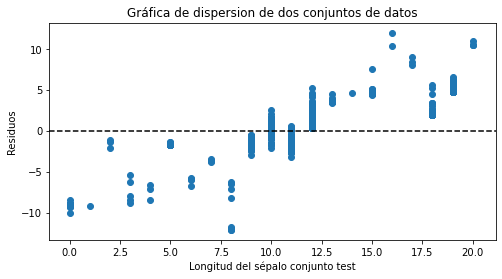

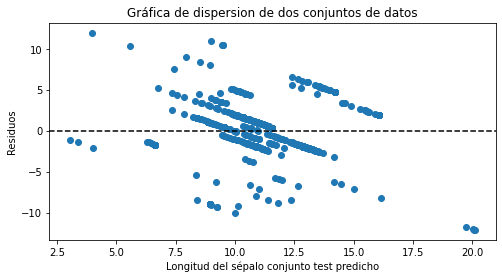

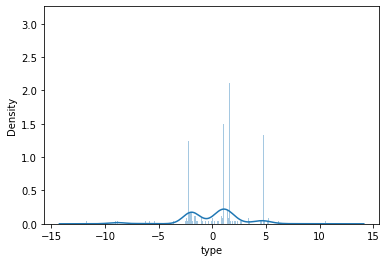

/home/adalaber/Descargas/yes/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


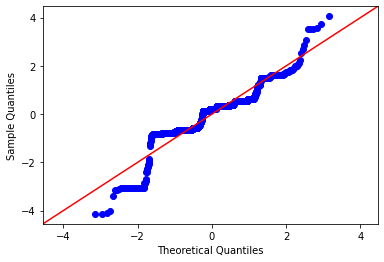

In [13]:
residuals = (y_test - y_prediction)


# 2. Independencia

fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y_test , y=residuals)
plt.axline((float(min(y_prediction)),0),(float(max(y_prediction)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Longitud del sépalo conjunto test')
ax.set_ylabel('Residuos')
plt.show()


# 3. Homocedasticidad

fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y_prediction , y=residuals)
plt.axline((float(min(y_prediction)),0),(float(max(y_prediction)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Longitud del sépalo conjunto test predicho')
ax.set_ylabel('Residuos')
plt.show()

# 4. Normalidad
fig = plt.figure()
sns.distplot(residuals,bins = len(residuals))
plt.show()
sm.qqplot(residuals, line = '45', fit = True)
py.show()

#### 2. Toma ahora el dataset del mejor modelo obtenido y aplica los siguentes modelos de regresión con regularización.

 - Ridge

In [16]:
x = vinos_encoded.drop(columns = ['price'])
y = vinos_encoded['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

LR = Ridge(normalize= True) 

LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

print('Para el conjunto train:')
print('El valor de r2 score es ',r2_score(y_train,y_prediction_train))
print('El valor de r2 score adjusted es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))
print('\n')
print('Para el conjunto test:')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto train:
El valor de r2 score es  0.30006275014317396
El valor de r2 score adjusted es  0.2988163244904808
El MAE es 39.43450584432502
EL RMSE es  135.98734111385187


Para el conjunto test:
El valor de r2 score es  0.29731968595495184
El valor de r2 score adjusted es  0.2922885619880422
El MAE es 44.39125373582196
EL RMSE es  136.50404727271018


 - Lasso

In [17]:
x = vinos_encoded.drop(columns = ['price'])
y = vinos_encoded['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

LR = Lasso(normalize= True) 

LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

print('Para el conjunto train:')
print('El valor de r2 score es ',r2_score(y_train,y_prediction_train))
print('El valor de r2 score adjusted es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))
print('\n')
print('Para el conjunto test:')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto train:
El valor de r2 score es  0.10051858557933635
El valor de r2 score adjusted es  0.09891681812191921
El MAE es 49.97296762966235
EL RMSE es  154.15763039370748


Para el conjunto test:
El valor de r2 score es  0.12094399797706246
El valor de r2 score adjusted es  0.1146500409220057
El MAE es 53.74059809312188
EL RMSE es  152.6774530870131


<font color = 'orange'> Tras aplicar las regresiones con las penalizaciones Ridge y Lasso vemos que hemos obtenido resultados peores.